In [1]:
import pandas as pd
from pathlib import Path

In [2]:
def count_hits(logfile):
    df = pd.read_csv(logfile, sep="\t",skiprows=3,engine="python")
    question_rows = df.loc[df["Code"].str.startswith("QUESTION", na=False)]
    counts = df["Stim Type"].value_counts()
    hit = counts.get("hit", 0)
    incorrect = counts.get("incorrect", 0)
    count = hit + incorrect
    return int(hit), int(incorrect), int(count)



In [3]:
logs_dir = Path('/home/neel/Desktop/mous_experiment/fmri_task')
log_files = sorted(logs_dir.glob("*.log"))

records = []
for logfile in log_files:
    subject_id = logfile.stem.split("-")[0]
    hit, incorrect, total = count_hits(logfile)
    records.append(
        {
            "subject": subject_id,
            "hits": hit,
            "incorrect": incorrect,
            "total": total,
        }
    )

performance_df = pd.DataFrame.from_records(records).set_index("subject")
performance_df



,hits,incorrect,total
subject,,,
A2002,14,10,24
A2003,17,7,24
A2004,21,2,23
A2005,17,7,24
A2006,19,5,24
...,...,...,...
V1113,19,5,24
V1114,18,6,24
V1115,19,5,24


In [4]:
def get_questions(logfile):
    df = pd.read_csv(logfile, sep="\t",skiprows=3,engine="python")
    question_rows = df.loc[df["Code"].str.startswith("QUESTION", na=False)]
    questions = question_rows["Code"].str.split(" ", n=1).str[1].tolist()
    return questions
get_questions('/home/neel/Desktop/mous_experiment/fmri_task/A2002-2-fMRI-MOUS-Aud.log')


['596',
 '732',
 '564',
 '337',
 '770',
 '286',
 '605',
 '341',
 '060',
 '371',
 '816',
 '293',
 '058',
 '168',
 '766',
 '730',
 '165',
 '179',
 '879',
 '535',
 '591',
 '082',
 '284',
 '538']

In [5]:
logs_dir = Path('/home/neel/Desktop/mous_experiment/fmri_task')
sub_question_dict = {}
for log in logs_dir.iterdir():
    subject = 'sub-' + log.stem.split("-")[0]
    questions = get_questions(log)
    sub_question_dict[subject] = questions
sub_question_dict

{'sub-A2039': ['152',
  '212',
  '018',
  '772',
  '318',
  '799',
  '659',
  '503',
  '357',
  '046',
  '848',
  '870',
  '047',
  '252',
  '291',
  '540',
  '632',
  '769',
  '237',
  '122',
  '851',
  '086',
  '677',
  '674'],
 'sub-V1062': ['179',
  '341',
  '371',
  '879',
  '538',
  '591',
  '596',
  '730',
  '535',
  '058',
  '168',
  '337',
  '060',
  '284',
  '564',
  '165',
  '770',
  '766',
  '082',
  '605',
  '286',
  '293',
  '816',
  '732'],
 'sub-A2059': ['064',
  '668',
  '091',
  '270',
  '096',
  '558',
  '871',
  '316',
  '786',
  '841',
  '560',
  '784',
  '793',
  '105',
  '035',
  '679',
  '379',
  '232',
  '266',
  '230',
  '038',
  '582',
  '665',
  '837'],
 'sub-A2027': ['632',
  '799',
  '848',
  '357',
  '047',
  '674',
  '503',
  '046',
  '086',
  '769',
  '212',
  '540',
  '252',
  '152',
  '659',
  '870',
  '772',
  '291',
  '851',
  '237',
  '318',
  '677',
  '018',
  '122'],
 'sub-A2104': ['174',
  '586',
  '547',
  '791',
  '159',
  '040',
  '737',
  '2

In [6]:


# parse expected questions from the text file (order preserved)
with open("/home/neel/Desktop/mous_experiment/questions.txt") as f:
    question_index = [
        line.split()[0]
        for line in f
        if line.strip()
    ]

subject_matrix = (
    pd.DataFrame.from_dict(
        {
            subject: {question: 1 for question in questions}
            for subject, questions in sorted(sub_question_dict.items())
        },
        orient="index",
    )
    .reindex(columns=question_index)
)

# optional: show which questions never appear for any subject
missing_questions = [q for q in question_index if subject_matrix[q].isna().all()]
missing_questions


['400', '900']

In [7]:
subject_matrix

,152,122,047,046,018,086,252,212,237,318,...,561,663,654,672,788,750,775,729,855,382
sub-A2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-A2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-A2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-A2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-A2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-V1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
sub-V1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
sub-V1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
sub-V1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [8]:
from pathlib import Path
import pandas as pd

def extract_question_outcomes(logfile: Path) -> tuple[list[str], list[str]]:
    df = pd.read_csv(logfile, sep="\t", skiprows=3, engine="python")
    question_rows = df.loc[df["Code"].str.startswith("QUESTION", na=False), ["Code", "Stim Type"]].copy()

    question_rows["question"] = (
        question_rows["Code"]
        .str.extract(r"QUESTION[ ._-]?(\d+)", expand=False)
        .str.zfill(3)
    )
    question_rows = question_rows.dropna(subset=["question"])

    stim_lower = question_rows["Stim Type"].astype(str).str.lower()
    hits = question_rows.loc[stim_lower.eq("hit"), "question"].tolist()
    incorrect = question_rows.loc[stim_lower.eq("incorrect"), "question"].tolist()
    return hits, incorrect

with open("/home/neel/Desktop/mous_experiment/questions.txt") as f:
    question_index = [line.split()[0] for line in f if line.strip()]

log_dir = Path("/home/neel/Desktop/mous_experiment/fmri_task")
log_files = sorted(log_dir.glob("*.log"))
subjects = [f"sub-{path.stem.split('-')[0]}" for path in log_files]

subject_matrix = pd.DataFrame(index=subjects, columns=question_index, dtype=float)

for logfile in log_files:
    subject_id = f"sub-{logfile.stem.split('-')[0]}"
    hits, incorrect = extract_question_outcomes(logfile)
    subject_matrix.loc[subject_id, hits] = 1
    subject_matrix.loc[subject_id, incorrect] = 0
    # ... existing loop that populates 1/0/NaN ...

subject_matrix["percent_correct"] = (
    subject_matrix.sum(axis=1) / subject_matrix.count(axis=1)
)

subject_matrix.to_csv('/home/neel/Desktop/mous_experiment/performance.csv')


In [9]:
import numpy as np
np.mean(list(subject_matrix['percent_correct']))


np.float64(0.7956555645973805)

In [10]:
import pandas as pd
from pathlib import Path

questions_path = Path("/home/neel/Desktop/mous_experiment/questions.txt")
records = []

with questions_path.open() as fh:
    for line in fh:
        line = line.strip()
        if not line:
            continue

        parts = line.split(maxsplit=2)
        if len(parts) < 3:
            continue

        question_number, _, full_question = parts
        if "genoemd" not in full_question:
            continue

        tokens = full_question.rstrip(" ?!.").split()
        try:
            idx = tokens.index("genoemd")
        except ValueError:
            continue  # defensive guard

        if idx == 0:
            continue  # no word before "genoemd"

        word_before_genoemd = tokens[idx - 1]
        records.append(
            {
                "question_number": question_number,
                "full_question": full_question,
                "target": word_before_genoemd,
            }
        )

genoemd_df = pd.DataFrame(records, columns=["question_number", "full_question", "target"])
genoemd_df


,question_number,full_question,target
0,047,Werden er kleine kinderen genoemd?,kinderen
1,018,Werd er een koe genoemd?,koe
2,252,Werd er een type bed genoemd?,bed
3,212,Werden er medicijnen genoemd?,medicijnen
4,058,Werd er een deel van een huis genoemd?,huis
...,...,...,...
73,672,Werd er boetseergerei genoemd?,boetseergerei
74,788,Werd er fruit genoemd?,fruit
75,775,Werd er een boom genoemd?,boom
76,729,Werd er een kind genoemd?,kind


In [16]:
#Check to see if the probe word exists in stimuli AT ALL
from collections import Counter

questions_path = Path("/home/neel/Desktop/mous_experiment/questions.txt")
stimuli_path = Path("/home/neel/Desktop/mous_experiment/stimuli.txt")

# read stimuli once and build a case-insensitive frequency counter
with stimuli_path.open() as fh:
    stim_words = Counter(word.strip(".,!?;:").lower() for line in fh for word in line.split())

records = []
with questions_path.open() as fh:
    for line in fh:
        line = line.strip()
        if not line:
            continue

        parts = line.split(maxsplit=2)
        if len(parts) < 3:
            continue

        question_number, _, full_question = parts
        if "genoemd" not in full_question:
            continue

        tokens = full_question.rstrip(" ?!.").split()
        try:
            idx = tokens.index("genoemd")
        except ValueError:
            continue
        if idx == 0:
            continue

        target = tokens[idx - 1]
        target_clean = target.strip(".,!?;:")
        target_count = stim_words[target_clean.lower()]
        records.append(
            {
                "question_number": question_number,
                "full_question": full_question,
                "target": target,
                "target_count_in_stimuli": target_count,
            }
        )

genoemd_all_counts_df = pd.DataFrame(
    records,
    columns=["question_number", "full_question", "target", "target_count_in_stimuli"],
)

genoemd_all_counts_df.to_csv('/home/neel/Desktop/mous_experiment/target_counts.csv')
genoemd_all_counts_df


,question_number,full_question,target,target_count_in_stimuli
0,047,Werden er kleine kinderen genoemd?,kinderen,8
1,018,Werd er een koe genoemd?,koe,0
2,252,Werd er een type bed genoemd?,bed,0
3,212,Werden er medicijnen genoemd?,medicijnen,0
4,058,Werd er een deel van een huis genoemd?,huis,10
...,...,...,...,...
73,672,Werd er boetseergerei genoemd?,boetseergerei,0
74,788,Werd er fruit genoemd?,fruit,2
75,775,Werd er een boom genoemd?,boom,2
76,729,Werd er een kind genoemd?,kind,0


In [18]:
genoemd_all_counts_df.loc[genoemd_all_counts_df['target_count_in_stimuli'] > 0].shape[0]

27

In [12]:
#check to see if the target word exists in the last-heard sentence

stimuli_path = Path("/home/neel/Desktop/mous_experiment/stimuli.txt")

stimuli_records = []
with stimuli_path.open() as fh:
    for line in fh:
        line = line.strip()
        if not line:
            continue
        stim_number_str, stim_sentence = line.split(maxsplit=1)
        stim_number = f"{int(stim_number_str):03d}"
        tokens = [tok.strip(".,!?;:").lower() for tok in stim_sentence.split()]
        stimuli_records.append(
            {
                "stim_number": stim_number,
                "stimulus_sentence": stim_sentence,
                "tokens": tokens,
            }
        )

stimuli_df = pd.DataFrame(stimuli_records)
stimuli_df


,stim_number,stimulus_sentence,tokens
0,001,Toen de barkeeper die de irritante klant bedie...,"[toen, de, barkeeper, die, de, irritante, klan..."
1,002,Toen de manke dronkaard die de barkeeper betaa...,"[toen, de, manke, dronkaard, die, de, barkeepe..."
2,003,De rector die de stoere puber strafte was erg ...,"[de, rector, die, de, stoere, puber, strafte, ..."
3,004,De inbreker die de gekrenkte pastoor smeekte w...,"[de, inbreker, die, de, gekrenkte, pastoor, sm..."
4,005,Vorige week kreeg de assistent die de bruine t...,"[vorige, week, kreeg, de, assistent, die, de, ..."
...,...,...,...
795,904,de bereiken bergen tocht camping door na wande...,"[de, bereiken, bergen, tocht, camping, door, n..."
796,905,komen groten dankzij de de in uitstekende geta...,"[komen, groten, dankzij, de, de, in, uitsteken..."
797,906,gemene van burgers dictator de toen schreeuwde...,"[gemene, van, burgers, dictator, de, toen, sch..."
798,907,moderne elektronisch klanten drogist de uitslu...,"[moderne, elektronisch, klanten, drogist, de, ..."


In [13]:
import pandas as pd
from pathlib import Path

stimuli_path = Path("/home/neel/Desktop/mous_experiment/stimuli.txt")

# rebuild the dataframe with tokens included
stimuli_records = []
with stimuli_path.open() as fh:
    for line in fh:
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        number = f"{int(parts[0]):03d}"
        sentence = " ".join(parts[1:])
        tokens = [tok.strip(".,!?;:").lower() for tok in parts[1:]]
        stimuli_records.append(
            {"question_number": number, "stimulus_sentence": sentence, "tokens": tokens}
        )

stimuli_df = pd.DataFrame(stimuli_records)

# align the key format
genoemd_df["question_number"] = genoemd_df["question_number"].astype(int).map("{:03d}".format)

# merge and add the indicator
genoemd_df = genoemd_df.merge(stimuli_df, on="question_number", how="left")

genoemd_df["target_in_sentence"] = genoemd_df.apply(
    lambda row: int(
        row["target"].strip(".,!?;:").lower()
        in (row["tokens"] if isinstance(row["tokens"], list) else [])
    ),
    axis=1,
)

genoemd_df["target_in_sentence"] = genoemd_df.apply(
    lambda row: int(
        row["target"].strip(".,!?;:").lower()
        in (row["tokens"] if isinstance(row["tokens"], list) else [])
    ),
    axis=1,
)
genoemd_df


,question_number,full_question,target,stimulus_sentence,tokens,target_in_sentence
0,047,Werden er kleine kinderen genoemd?,kinderen,De opgesloten peuters die de ouders alarmeren ...,"[de, opgesloten, peuters, die, de, ouders, ala...",0
1,018,Werd er een koe genoemd?,koe,De politieman die de agressieve kraker arreste...,"[de, politieman, die, de, agressieve, kraker, ...",0
2,252,Werd er een type bed genoemd?,bed,in de wieg lag een baby met gebalde knuistjes ...,"[in, de, wieg, lag, een, baby, met, gebalde, k...",0
3,212,Werden er medicijnen genoemd?,medicijnen,Niet alle pillen en blauwe poeders kunnen zond...,"[niet, alle, pillen, en, blauwe, poeders, kunn...",0
4,058,Werd er een deel van een huis genoemd?,huis,Ik schrok toen de goedkope beunhaas die het ac...,"[ik, schrok, toen, de, goedkope, beunhaas, die...",0
...,...,...,...,...,...,...
73,672,Werd er boetseergerei genoemd?,boetseergerei,had dat Joris penseel was stevige van het de w...,"[had, dat, joris, penseel, was, stevige, van, ...",0
74,788,Werd er fruit genoemd?,fruit,lachwekkende laaiend met de het vermaken dwaas...,"[lachwekkende, laaiend, met, de, het, vermaken...",0
75,775,Werd er een boom genoemd?,boom,eeuwenoude in eik de onder witte de bloeien tu...,"[eeuwenoude, in, eik, de, onder, witte, de, bl...",0
76,729,Werd er een kind genoemd?,kind,voor diepe de een maakte buiging koningin nieu...,"[voor, diepe, de, een, maakte, buiging, koning...",0


In [15]:

genoemd_df["target_in_sentence"].sum()


np.int64(3)

In [ ]:


# load SUBTLEX (set dtype=str to keep accents/casing intact)
subtlex_path = "/home/neel/Desktop/MOUS_hierarchical-representations/tables/SUBTLEX-NL with pos and Zipf.xlsx"
subtlex_df = pd.read_excel(subtlex_path, dtype={"Word": str})

# normalise casing for a safe join
subtlex_df["Word_lower"] = subtlex_df["Word"].str.lower()
genoemd_all_counts_df["target_lower"] = genoemd_all_counts_df["target"].str.lower()

# bring the frequency into the genoemd_all_counts_df frame
genoemd_all_counts_df = genoemd_all_counts_df.merge(
    subtlex_df[["Word_lower", "FREQcount"]],
    how="left",
    left_on="target_lower",
    right_on="Word_lower",
)

genoemd_all_counts_df = genoemd_all_counts_df.drop(columns=["target_lower", "Word_lower"])
genoemd_all_counts_df = genoemd_all_counts_df.rename(columns={"FREQcount": "subtlex_freqcount"})
genoemd_all_counts_df.to_csv('/home/neel/Desktop/mous_experiment/real_targets_freqcount.csv')


In [28]:
genoemd_all_counts_df

,question_number,full_question,target,target_count_in_stimuli,subtlex_freqcount
0,047,Werden er kleine kinderen genoemd?,kinderen,8,20749.0
1,018,Werd er een koe genoemd?,koe,0,811.0
2,252,Werd er een type bed genoemd?,bed,0,10492.0
3,212,Werden er medicijnen genoemd?,medicijnen,0,1704.0
4,058,Werd er een deel van een huis genoemd?,huis,10,35810.0
...,...,...,...,...,...
73,672,Werd er boetseergerei genoemd?,boetseergerei,0,NaN
74,788,Werd er fruit genoemd?,fruit,2,566.0
75,775,Werd er een boom genoemd?,boom,2,2285.0
76,729,Werd er een kind genoemd?,kind,0,14575.0


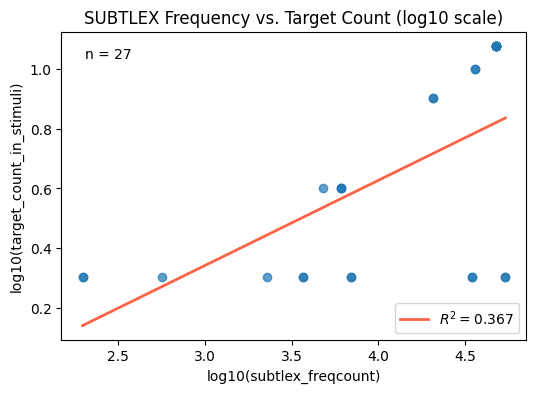

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plot_df = genoemd_all_counts_df.loc[
    genoemd_all_counts_df["target_count_in_stimuli"] > 0,
    ["target_count_in_stimuli", "subtlex_freqcount"],
].dropna()

x = np.log10(plot_df["subtlex_freqcount"])
y = np.log10(plot_df["target_count_in_stimuli"])

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y, alpha=0.7)

m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r_squared = 1 - ss_res / ss_tot

x_line = np.linspace(x.min(), x.max(), 100)
ax.plot(x_line, m * x_line + b, color="tomato", linewidth=2, label=f"$R^2 = {r_squared:.3f}$")
ax.legend()

ax.text(
    0.05,
    0.95,
    f"n = {len(plot_df)}",
    transform=ax.transAxes,
    va="top",
    ha="left",
    fontsize=10,
)

ax.set_xlabel("log10(subtlex_freqcount)")
ax.set_ylabel("log10(target_count_in_stimuli)")
ax.set_title("SUBTLEX Frequency vs. Target Count (log10 scale)")
plt.show()


In [25]:
# keep percent_correct plus any question appearing in genoemd_df
genoemd_questions = set(genoemd_df["question_number"])
cols_after_a = [
    col for col in subject_matrix.columns
    if col == "percent_correct" or col in genoemd_questions
]
subject_matrix = subject_matrix.loc[:, cols_after_a]


In [26]:
subject_matrix

,047,018,252,212,058,165,341,284,293,070,...,730,516,663,654,672,788,775,729,382,percent_correct
sub-A2002,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333
sub-A2003,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708333
sub-A2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.913043
sub-A2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708333
sub-A2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-V1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.791667
sub-V1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000
sub-V1115,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.791667
sub-V1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.863636


In [27]:
percent_mean = subject_matrix["percent_correct"].mean()
percent_std = subject_matrix["percent_correct"].std()

percent_mean, percent_std


(np.float64(0.7956555645973805), np.float64(0.0865569343177749))